In [1]:
#Import LIBRARIES
import ast
import matplotlib.pyplot as plt
import pandas as pd
from datasets import load_dataset
from adjustText import adjust_text
import seaborn as sns
#Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#data clean up

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply( lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_DA_US= df[
    (df['job_country']== 'United States')& 
    (df['job_title_short'] == 'Data Analyst')
    ].copy()

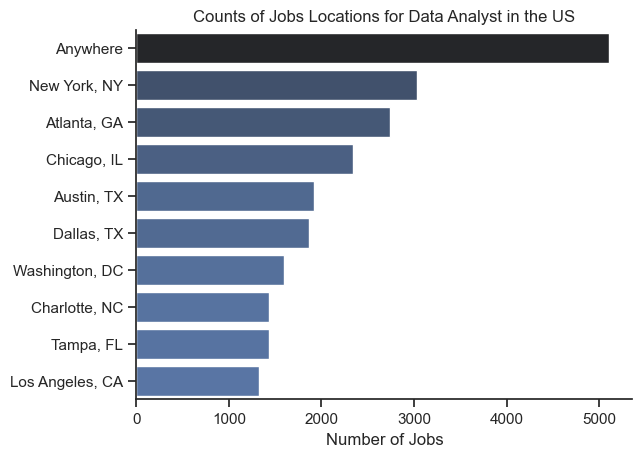

In [18]:
df_plot = df_DA_US['job_location'].value_counts().head(10).to_frame()


sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Counts of Jobs Locations for Data Analyst in the US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

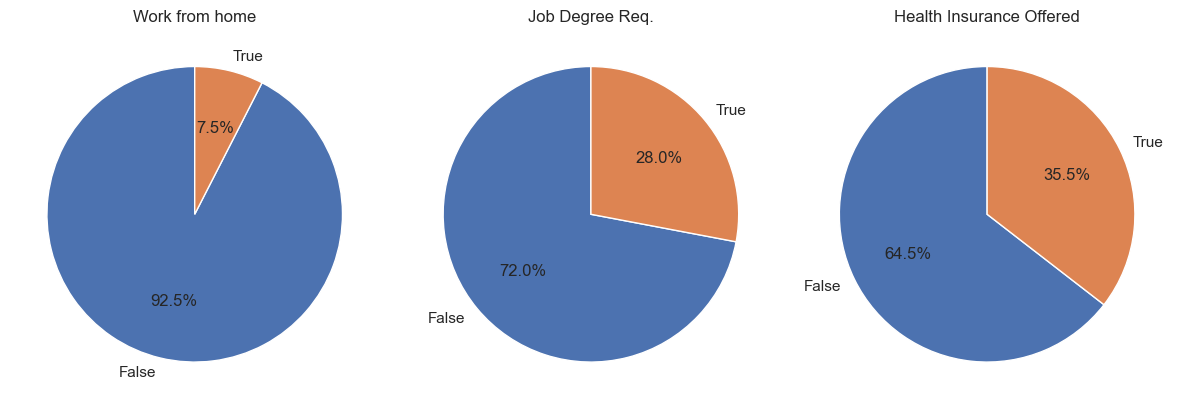

In [22]:
dict_column = {
    'job_work_from_home': 'Work from home', 
    'job_no_degree_mention': 'Job Degree Req.',
    'job_health_insurance': 'Health Insurance Offered'

}

fig, ax = plt.subplots(1, 3)
fig.set_size_inches((12,5))

for i,  (column, title) in enumerate(dict_column.items()):
    
    ax[i].pie(df_DA_US[column].value_counts(), startangle=90, autopct='%1.1f%%', labels=['False', 'True'])
    ax[i].set_title(title)


fig.tight_layout()
plt.show()

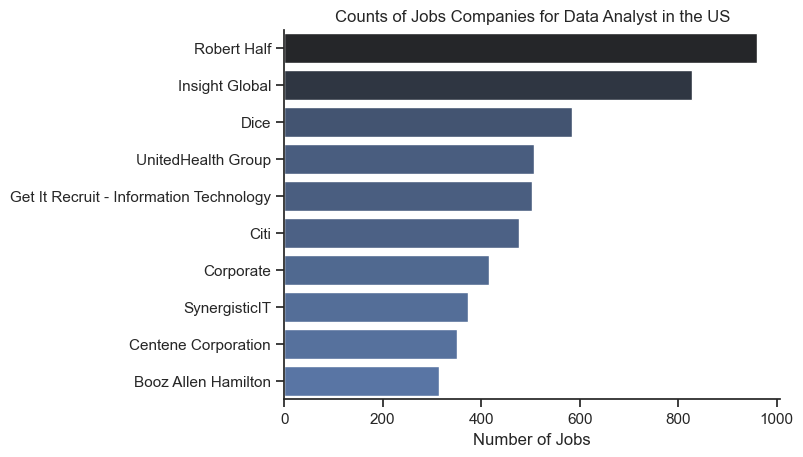

In [24]:
df_plot = df_DA_US['company_name'].value_counts().head(10).to_frame()


sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Counts of Jobs Companies for Data Analyst in the US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()